<a href="https://colab.research.google.com/github/jonathannocek/pga-data-analysis/blob/master/pga_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PGA Data Analysis**
By: Jonathan Nocek

Date: November 2019











## **Overview**

This analysis is apart of a project for my Applied Data Analysis class at Illinois Wesleyan University. As a member of the golf team here at IWU and a Computer Science Major/Data Science Minor, this project combines many of my interests and could provide value to myself and the golfing community. 

## **Dataframe**

I have three different datasets. The first one was created using a data scraping notebook which pulled the desired statistics from the PGATour.com website. The second dataset was downloaded from Kaggle and was incorporated in the middle of the project after I decided I wanted additional statistics in order to further help my analysis. The final dataset is of the golfers on my team at Illinois Wesleyan University was from created from the BirdieFire portal which our team uses to track our statistics throughout the year. 

Currently, I will only be working on the PGA Tour player dataset, but I do have future plans to incorporate college data to analyze college golf versus PGA Tour golf. 

The statistics for the PGA Tour players were collected through a data scraping notebook that accesses the data from the [PGA Tour](https://www.pgatour.com/stats.html). The archives provide hundreds of statistics for the past seasons. I have selected a variety of statistics and have selected to utilize the 2010-2019 PGA Tour seasons. I modified [this](https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/master/PGAtour.com%20Web%20Scraper.ipynb) notebook to collect these statistics.

[Data Source 1](https://github.com/jonathannocek/pga-data-analysis/blob/master/pga_data_scraping.ipynb)

[Data Source 2](https://www.kaggle.com/bradklassen/pga-tour-20102018-data)

### **Variables**
Descriptions taken from the PGA TOUR's website. The Strokes Gained concept can confusing so [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html) is a detailed explanation of the statistic. It has revolutionized golf statistics and has provided significant insight as to how a player analyzes their game. 

The Strokes Gained - concept is a by-product of the PGA TOUR's ShotLink Intelligence Program, which encourages academics to perform research against ShotLink statistical data. Professor Mark Broadie from Columbia Business School developed the early concept which was later refined by the TOUR.

The following is a list of the important variable to understand for the notebook. The full list of variable can be found in the appendix.

*   **SCORING** - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played. The adjustment is computed by determining the stroke average of the field for each round played. This average is subtracted from par to create an adjustment for each round. A player accumulates these adjustments for each round played.
*   **DRIVE_DISTANCE** - The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not 
*   **FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).
*   **GIR_%** - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. (The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))
*   **SG_P (Strokes Gained Putting)** - The number of putts a player takes from a specific distance is measured against a statistical baseline to determine the player's strokes gained or lost on a hole. The sum of the values for all holes played in a round minus the field average strokes gained/lost for the round is the player's Strokes gained/lost for that round. The sum of strokes gained for each round are divided by total rounds played. 
*   **SG_ATG (Strokes Gained Around the Green)** - The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_APP (Strokes Gained Approach)** - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_OTT (Strokes Gained Off the Tee)** - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee on a hole. 
*   **SG_TTG (Strokes Gained Tee to Green)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event minus the Players Strokes Gained putting value. 
*   **SG_T (Strokes Gained Total)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event.

## **Process**

[Arch](https://drive.google.com/open?id=1vjgFIGe38E3GSIcTc6pP3vVLeEDeQjsD)

## **Questions**

* Which statistics predictors have the largest effect on scoring average on the PGA Tour?
* What is the difference between a great season on TOUR, an average season, and a poor season? Where do these differences come from?
* What has changed on TOUR over the last ten years (2010-2019)?   
* How has the driving distance on TOUR changed 


# **Installation**

The following installs the necessary packages and collects the dataset from your Google Drive. The dataset will be publically available on my [Github](https://github.com/jonathannocek/pga-data-analysis/tree/master).

In [2]:
# Importing necessary packages
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading dataset
from google.colab import drive
# Will prompt for authentication
drive.mount('/content/drive')

# Using pandas to create dataframe by reading csv from my google drive
df_iwu = pd.read_csv('drive/My Drive/2017_2019_IWU_Stats.csv')
df_pga = pd.read_csv('drive/My Drive/2010_2019_PGA_Stats.csv')
df_kaggle = pd.read_csv('drive/My Drive/PGA_Data_Historical.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **General Descriptives**

In [3]:
df_pga.head()

Unnamed: 0            NAME  ROUNDS  SCORING  ...  POINTS  TOP 10  1ST  Year
0           0     Matt Kuchar      97   69.606  ...   2,728    11.0  1.0  2010
1           1  Steve Stricker      73   69.660  ...   2,028     9.0  2.0  2010
2           2   Retief Goosen      75   69.718  ...   1,360    10.0  NaN  2010
3           3      Paul Casey      64   69.720  ...   2,250     7.0  NaN  2010
4           4       Jim Furyk      76   69.828  ...   2,980     7.0  3.0  2010

[5 rows x 20 columns]

In [4]:
df_pga.describe().round(2)

Unnamed: 0   ROUNDS  SCORING  ...   TOP 10     1ST     Year
count     1866.00  1866.00  1866.00  ...  1540.00  346.00  1866.00
mean        92.87    78.54    70.93  ...     3.25    1.27  2014.51
std         53.99    14.11     0.70  ...     2.31    0.67     2.89
min          0.00    45.00    68.70  ...     1.00    1.00  2010.00
25%         46.00    69.00    70.50  ...     1.00    1.00  2012.00
50%         93.00    79.00    70.91  ...     3.00    1.00  2015.00
75%        139.00    89.00    71.35  ...     4.00    1.00  2017.00
max        192.00   122.00    74.40  ...    15.00    5.00  2019.00

[8 rows x 18 columns]

**Observations**

- There is a null column "Unnamed: 0" that will need to be dropped.
- Some of the column names can be changed in order to make the statistics more understandable for the non-golfer.
- TOP 10 and 1ST contain many NaN values that will need to be replaced with 0s. This is because the data was filled with NaN whenever a player did not win or finish inside of the Top 10 in a given season. 

# **Data Cleaning**

One problem with the data set above is that it contains an extra column from the key in the csv file. We can simply drop this column entirely.

In [0]:
df_pga = df_pga.drop('Unnamed: 0', 1) # Drop leftover column with old key

As shown above, whenever a player did not win an event or finish inside the top 10 in a given season, the were given a blank or NaN. Here, we are going to replace all of these instances with a 0. 

In [6]:
#Replace null and blank values with '0'
df_pga.fillna('0', inplace=True)
df_pga.replace('', '0', inplace=True)
df_pga.head()

NAME  ROUNDS  SCORING  DRIVE_DISTANCE  ...  POINTS  TOP 10  1ST  Year
0     Matt Kuchar      97   69.606           286.9  ...   2,728      11    1  2010
1  Steve Stricker      73   69.660           282.9  ...   2,028       9    2  2010
2   Retief Goosen      75   69.718           291.4  ...   1,360      10    0  2010
3      Paul Casey      64   69.720           294.2  ...   2,250       7    0  2010
4       Jim Furyk      76   69.828           276.0  ...   2,980       7    3  2010

[5 rows x 19 columns]

As shown below, all of the NaN values are now replaced with 0s. 

In [7]:
df_pga.isna().sum()

NAME              0
ROUNDS            0
SCORING           0
DRIVE_DISTANCE    0
FWY_%             0
GIR_%             0
SG_P              0
SG_ATG            0
SG_APP            0
SG_OTT            0
SG_TTG            0
SG_T              0
PAR3              0
PAR4              0
PAR5              0
POINTS            0
TOP 10            0
1ST               0
Year              0
dtype: int64

Check datatypes again. Points, Top 10, and 1st are still objects

In [8]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 19 columns):
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1866 non-null object
TOP 10            1866 non-null object
1ST               1866 non-null object
Year              1866 non-null int64
dtypes: float64(13), int64(2), object(4)
memory usage: 277.1+ KB


**Oberservations**

- Points, Top 10, and 1st are all the object data types and will need to be switched to numerics. 

In [0]:
#Convert the following columns from object to float
df_pga['POINTS'] = df_pga['POINTS'].apply(pd.to_numeric, errors='coerce')
df_pga['TOP 10'] = df_pga['TOP 10'].apply(pd.to_numeric, errors='coerce')
df_pga['1ST'] = df_pga['1ST'].apply(pd.to_numeric, errors='coerce')
# Fillna
df_pga.fillna('0', inplace=True)
df_pga['POINTS'] = df_pga['POINTS'].apply(pd.to_numeric, errors='ignore')

In [10]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 19 columns):
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1866 non-null float64
TOP 10            1866 non-null float64
1ST               1866 non-null float64
Year              1866 non-null int64
dtypes: float64(16), int64(2), object(1)
memory usage: 277.1+ KB


# **Combining Datasets**

After starting this notebook, I realized that there would be additional statistics that I want to pull into the dataframe in order to best answer the questions. However, the PGA TOUR had made changes to their website which rendered my current data scraping notebook using BeautifulSoup useless due to their not being tags for BeauitfulSoup to use. I found a Kaggle dataset to pull and merge with my current dataframe to solve the problem.


Combining statistics I want from the kaggle dataset with the PGA dataset from the data scraping notebook. I used [this notebook](https://www.kaggle.com/mesadowski/moneyball-golf-scikit-learn-and-tf-estimator-api) to help clean the kaggle dataset. This data is not available on my GitHub due to the size of the file.

In [11]:
df_kaggle.head()

Player Name  Season         Statistic                     Variable Value
0  Robert Garrigus    2010  Driving Distance  Driving Distance - (ROUNDS)    71
1     Bubba Watson    2010  Driving Distance  Driving Distance - (ROUNDS)    77
2   Dustin Johnson    2010  Driving Distance  Driving Distance - (ROUNDS)    83
3  Brett Wetterich    2010  Driving Distance  Driving Distance - (ROUNDS)    54
4      J.B. Holmes    2010  Driving Distance  Driving Distance - (ROUNDS)   100

In [12]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740403 entries, 0 to 2740402
Data columns (total 5 columns):
Player Name    object
Season         int64
Statistic      object
Variable       object
Value          object
dtypes: int64(1), object(4)
memory usage: 104.5+ MB


In [0]:
df_pga_kaggle = df_kaggle.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()

In [14]:
df_pga_kaggle.columns

Index(['Player Name', 'Season',
       '% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S)',
       '% of Potential Pts won - FedExCup Playoffs - (# OF WINS)',
       '% of Potential Pts won - FedExCup Playoffs - (%)',
       '% of Potential Pts won - FedExCup Playoffs - (EVENTS)',
       '% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON)',
       '% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS)',
       '% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S)',
       '% of Potential Pts won - FedExCup Regular Season - (# OF WINS)',
       ...
       'Total Money (Official and Unofficial) - (EVENTS)',
       'Total Money (Official and Unofficial) - (MONEY)',
       'Total Putting - (EVENTS)', 'Total Putting - (TOTAL)',
       'Victory Leaders - (EVENTS)', 'Victory Leaders - (VICTORIES)',
       'World Golf Ranking Points - (EVENTS)',
       'World Golf Ranking Points - (POINTS)', 'World Money List - (EVENTS)',
       'World Money List 

Listing out all of the statistics in the Kaggle dataset, I went through and found the ones that would be useful for my project.
- Player Name
- Season 
- Birdie Average
- World Money List
- Bounce Back
- GIR Percentage - 200+ yards
- GIR Percentage - 175-200 yards
- GIR Percentage - 150-175 yards
- GIR Percentage - 125-150 yards
- GIR Percentage - < 125 yards
- Club Head Speed
- Ball Speed
- Smash Factor
- Bogey Average
- Launch Angle
- Spin Rate

In [0]:
keep_columns = ['Player Name','Season','Birdie Average - (AVG)', 'Bogey Average - (AVERAGE BOGEYS PER ROUND)', 'Total Money (Official and Unofficial) - (MONEY)','Bounce Back - (%)','GIR Percentage - 200+ yards - (%)','GIR Percentage - 175-200 yards - (%)',
                'GIR Percentage - 150-175 yards - (%)','GIR Percentage - 125-150 yards - (%)','GIR Percentage - < 125 yards - (%)','Club Head Speed - (AVG.)',
                'Ball Speed - (AVG.)','Smash Factor - (AVG.)','Launch Angle - (AVG.)','Spin Rate - (AVG.)']

In [0]:
# Rename columns to make easier to understand
df_pga2 = df_pga_kaggle[keep_columns].dropna()
df_pga2.rename(columns = {'Player Name':'NAME'}, inplace = True)
df_pga2.rename(columns = {'Season':'Year'}, inplace = True)
df_pga2.rename(columns = {'Birdie Average - (AVG)':'Birdie Avg'}, inplace = True)
df_pga2.rename(columns = {'Bogey Average - (AVERAGE BOGEYS PER ROUND)':'Bogey Avg'}, inplace = True)
df_pga2.rename(columns = {'Total Money (Official and Unofficial) - (MONEY)':'Money'}, inplace = True)
df_pga2.rename(columns = {'Bounce Back - (%)':'BounceBack%'}, inplace = True)
df_pga2.rename(columns = {'GIR Percentage - 200+ yards - (%)':'GIR% 200+'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 175-200 yards - (%)':'GIR% 175-200'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 150-175 yards - (%)':'GIR% 150-175'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 125-150 yards - (%)':'GIR% 125-150'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - < 125 yards - (%)':'GIR% <125'}, inplace=True)
df_pga2.rename(columns = {'Club Head Speed - (AVG.)':'Club Head Speed'}, inplace=True)
df_pga2.rename(columns = {'Ball Speed - (AVG.)':'Ball Speed'}, inplace=True)
df_pga2.rename(columns = {'Smash Factor - (AVG.)':'Smash Factor'}, inplace=True)
df_pga2.rename(columns = {'Launch Angle - (AVG.)':'Launch Angle'}, inplace=True)
df_pga2.rename(columns = {'Spin Rate - (AVG.)':'Spin Rate'}, inplace=True)

In [17]:
df_pga.set_index(['NAME', 'Year']).head()

ROUNDS  SCORING  DRIVE_DISTANCE  ...  POINTS  TOP 10  1ST
NAME           Year                                   ...                     
Matt Kuchar    2010      97   69.606           286.9  ...     0.0    11.0  1.0
Steve Stricker 2010      73   69.660           282.9  ...     0.0     9.0  2.0
Retief Goosen  2010      75   69.718           291.4  ...     0.0    10.0  0.0
Paul Casey     2010      64   69.720           294.2  ...     0.0     7.0  0.0
Jim Furyk      2010      76   69.828           276.0  ...     0.0     7.0  3.0

[5 rows x 17 columns]

In [18]:
df_pga2.set_index(['NAME','Year']).head()

Variable            Birdie Avg Bogey Avg  ... Launch Angle Spin Rate
NAME           Year                       ...                       
Aaron Baddeley 2010       3.76      2.53  ...         9.49   2,988.3
               2011       4.08      2.62  ...         8.59   2,984.6
               2012       3.51      2.97  ...         9.04   3,096.0
               2013       3.50      3.12  ...         9.08   2,959.4
               2014       3.54      2.79  ...         9.57   2,930.4

[5 rows x 14 columns]

In [19]:
# Left merge on the multiindex NAME, Year
df = pd.merge(df_pga, df_pga2,  how='left', left_on=['NAME','Year'], right_on = ['NAME','Year'])
df.head()

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
0     Matt Kuchar      97   69.606  ...         1.476         10.77    2,488.8
1  Steve Stricker      73   69.660  ...         1.477         11.10    2,673.7
2   Retief Goosen      75   69.718  ...         1.481         10.59    2,780.9
3      Paul Casey      64   69.720  ...         1.476         10.31    2,594.3
4       Jim Furyk      76   69.828  ...         1.476         10.02    2,674.5

[5 rows x 33 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 1865
Data columns (total 33 columns):
NAME               1866 non-null object
ROUNDS             1866 non-null int64
SCORING            1866 non-null float64
DRIVE_DISTANCE     1866 non-null float64
FWY_%              1866 non-null float64
GIR_%              1866 non-null float64
SG_P               1866 non-null float64
SG_ATG             1866 non-null float64
SG_APP             1866 non-null float64
SG_OTT             1866 non-null float64
SG_TTG             1866 non-null float64
SG_T               1866 non-null float64
PAR3               1866 non-null float64
PAR4               1866 non-null float64
PAR5               1866 non-null float64
POINTS             1866 non-null float64
TOP 10             1866 non-null float64
1ST                1866 non-null float64
Year               1866 non-null int64
Birdie Avg         1657 non-null object
Bogey Avg          1657 non-null object
Money              1657 non-null object

**Observations**

- The new columns are all object datatypes. They will need to be changed to numerics.
- Money and Spin Rate contains non-int characters which will present a problem when converting. 

In [21]:
# Remove commas and dollar signs from Money and Spin Rate so pd.to_numeric works
df['Money']= df['Money'].str.replace('$','')
df['Money']= df['Money'].str.replace(',','')
df['Spin Rate'] = df['Spin Rate'].str.replace(',','')

# Columns we want to convert to numeric
change_columns = ['Birdie Avg', 'Bogey Avg', 'Money','BounceBack%','GIR% 200+','GIR% 175-200',
                'GIR% 150-175','GIR% 125-150','GIR% <125','Club Head Speed',
                'Ball Speed','Smash Factor','Launch Angle','Spin Rate']

for col in change_columns:
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 1865
Data columns (total 33 columns):
NAME               1866 non-null object
ROUNDS             1866 non-null int64
SCORING            1866 non-null float64
DRIVE_DISTANCE     1866 non-null float64
FWY_%              1866 non-null float64
GIR_%              1866 non-null float64
SG_P               1866 non-null float64
SG_ATG             1866 non-null float64
SG_APP             1866 non-null float64
SG_OTT             1866 non-null float64
SG_TTG             1866 non-null float64
SG_T               1866 non-null float64
PAR3               1866 non-null float64
PAR4               1866 non-null float64
PAR5               1866 non-null float64
POINTS             1866 non-null float64
TOP 10             1866 non-null float64
1ST                1866 non-null float64
Year               1866 non-null int64
Birdie Avg         1657 non-null float64
Bogey Avg          1657 non-null float64
Money              1657 non-null floa

In [22]:
df = df.dropna()
df.isna().sum()

NAME               0
ROUNDS             0
SCORING            0
DRIVE_DISTANCE     0
FWY_%              0
GIR_%              0
SG_P               0
SG_ATG             0
SG_APP             0
SG_OTT             0
SG_TTG             0
SG_T               0
PAR3               0
PAR4               0
PAR5               0
POINTS             0
TOP 10             0
1ST                0
Year               0
Birdie Avg         0
Bogey Avg          0
Money              0
BounceBack%        0
GIR% 200+          0
GIR% 175-200       0
GIR% 150-175       0
GIR% 125-150       0
GIR% <125          0
Club Head Speed    0
Ball Speed         0
Smash Factor       0
Launch Angle       0
Spin Rate          0
dtype: int64

In [23]:
# Creating PGA Average dataset
df_mean = pd.DataFrame()
df_mean['PGA_AVG'] = df.mean()
df_mean.transpose().round(2)

ROUNDS  SCORING  DRIVE_DISTANCE  ...  Smash Factor  Launch Angle  Spin Rate
PGA_AVG   78.85    70.92          290.79  ...          1.48         10.85    2633.05

[1 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1677
Data columns (total 33 columns):
NAME               1657 non-null object
ROUNDS             1657 non-null int64
SCORING            1657 non-null float64
DRIVE_DISTANCE     1657 non-null float64
FWY_%              1657 non-null float64
GIR_%              1657 non-null float64
SG_P               1657 non-null float64
SG_ATG             1657 non-null float64
SG_APP             1657 non-null float64
SG_OTT             1657 non-null float64
SG_TTG             1657 non-null float64
SG_T               1657 non-null float64
PAR3               1657 non-null float64
PAR4               1657 non-null float64
PAR5               1657 non-null float64
POINTS             1657 non-null float64
TOP 10             1657 non-null float64
1ST                1657 non-null float64
Year               1657 non-null int64
Birdie Avg         1657 non-null float64
Bogey Avg          1657 non-null float64
Money              1657 non-null floa

# **Question 1: What statistics determine scoring avarage?**

In question 1, I want to determine which statistics have the most significant effect on scoring average and which statistics have less of a effect on scoring average. This could help players understand where they can look to improve their games. I will also look at whether these statistics are in agreement with the common beliefs or if there are misconceptions. 

## **Descriptives**

In [69]:
df.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING            1.000000
SG_T               0.962421
SG_TTG             0.844223
PAR4               0.794842
TOP 10             0.758333
Money              0.747528
Birdie Avg         0.677281
SG_APP             0.667615
Bogey Avg          0.666632
PAR5               0.636309
SG_OTT             0.532599
GIR_%              0.484068
PAR3               0.425038
1ST                0.417051
SG_ATG             0.389737
GIR% 175-200       0.384084
SG_P               0.365449
BounceBack%        0.363029
GIR% 200+          0.355313
GIR% 150-175       0.316321
ROUNDS             0.310619
GIR% <125          0.299800
GIR% 125-150       0.276418
DRIVE_DISTANCE     0.275054
Ball Speed         0.254003
Club Head Speed    0.236576
FWY_%              0.170209
POINTS             0.072156
Smash Factor       0.054839
Launch Angle       0.028018
Spin Rate          0.016935
Year               0.010238
Name: SCORING, dtype: float64

**Observations**

Here, we can start to see which statistics are the most important to your scoring average. One thing to consider is whether these datasets have a normal distribution as the correlation statistic relies on that. 
* Strokes Gained Total (0.962) is highly correlated with Scoring Average. This makes sense as SG Total is essientally a more advanced Scoring Average statisic.
* One interesting thing to look at is the differences between correlation between the different aspects of a golfer's game. (SG-Off the Tee, SG-Approach, SG-Around the Green, SG-Putting) Out of these four, SG-Approach (0.667) is the most correlated with Scoring Average which would suggest that your approaches are the most important aspect of scoring low. SG-Putting (0.365) is the lowest of the four, so this would suggest that putting is the least important part of scoring well. 
* Par4 scoring (0.795) is more important than Par3 (0.425) and Par5 scoring (0.636), however, this is misleading since there is typically more Par4 each round than Par3s and Par5s. 
* It is interesting to see how unimportant hitting the fairway (0.170) is to scoring average. There is little to no correlation. 
* Getting many top 10s (0.758) is a better predictor to the best players versus wins (0.417).

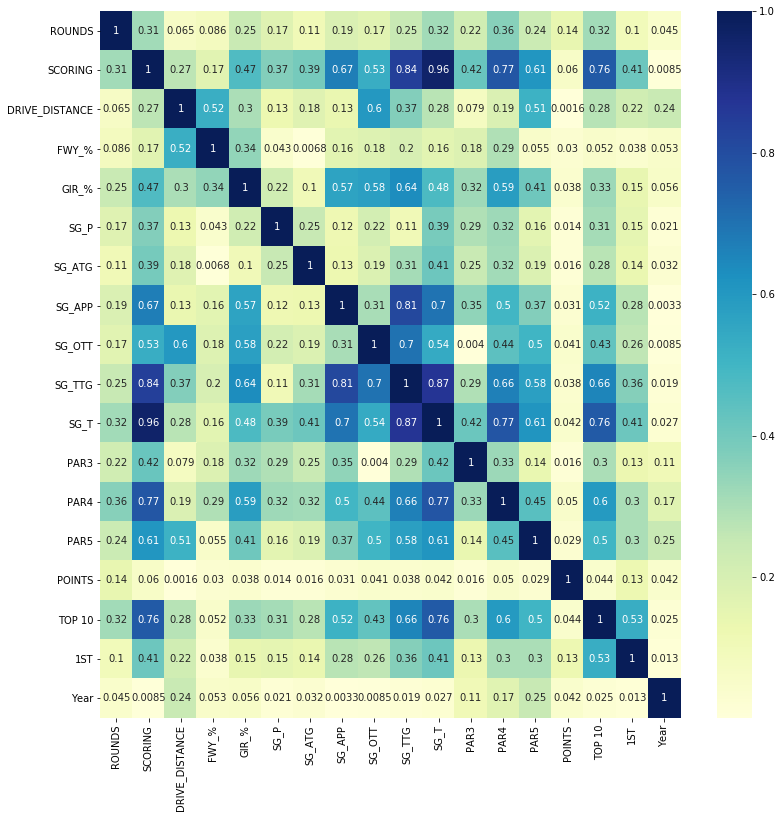

In [68]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_pga.corr().abs(), annot=True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

**Obeservations**

Below is a correlational heatmap. There is a bug within matplotlib where the top and bottom rows are cut off, the code below was found [here](https://github.com/mwaskom/seaborn/issues/1773) and fixes this issue. Here are my obervations
* FWY% and GIR% are two very commonly kept statistics by golfers. Greens in regulations have high correlation with the important strokes gained statistics and Fairway% has little to no correlation. This leds me to believe that hitting the green is much more important than hitting the fairway. Therefore off the tee box, you should prioritze hitting your ball into a spot where you have the best chance of hitting the green. Therefore, closer to the green in the rough could be better than farther and in the fairway. This can go aganist the common strategy to hit irons off the tee to keep it in the fairway versus swinging away with driver. 
* Driving Distance and FWY% are correlated. Hence, the farther someone hits the ball, the less likely they are to hit the fairway. Driving distance is also highly correlated with Strokes Gained-Off the tee. This suggests that the players who hit it the furthest have the best Strokes Gained-Off the tee. Additionaly, Driving distance is also highly correlated with Par5 scoring as opposed to Par4 and Par3 scoring. Again, players will have a better chance to reach the green in two when they hit the ball farther. 


## **Distributions**

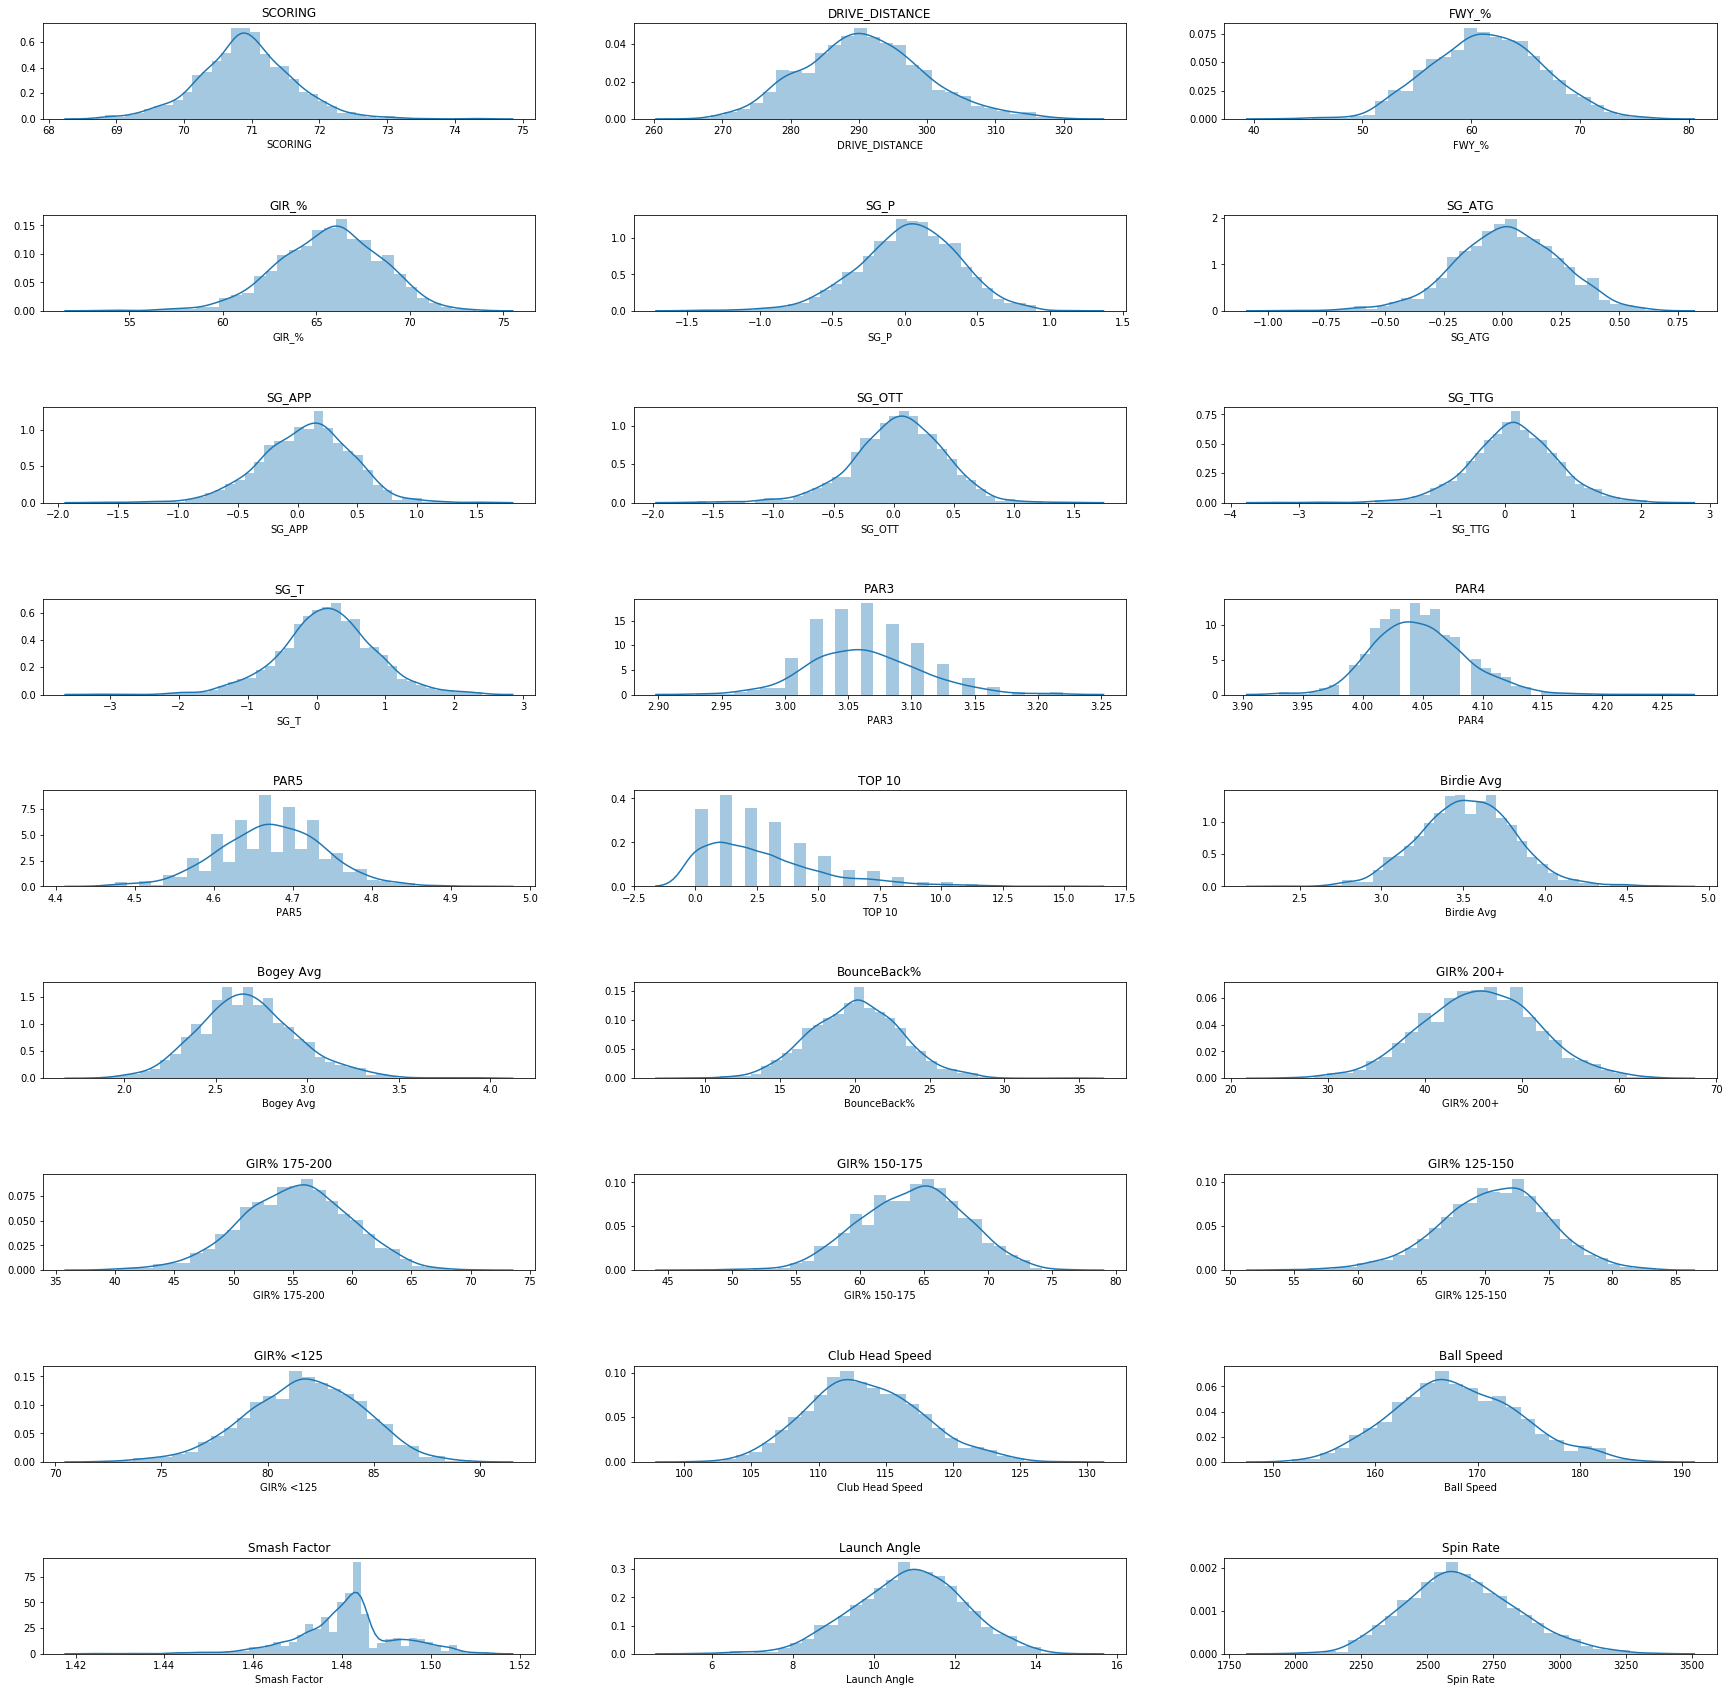

In [26]:
f, ax = plt.subplots(nrows = 9, ncols = 3, figsize=(30,30))
# Selecting columns we want distributions for 
hist_cols = ['SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_ATG', 'SG_APP', 'SG_OTT', 'SG_TTG', 'SG_T', 'PAR3', 'PAR4', 'PAR5',
       'TOP 10', 'Birdie Avg', 'Bogey Avg',
       'BounceBack%', 'GIR% 200+', 'GIR% 175-200', 'GIR% 150-175',
       'GIR% 125-150', 'GIR% <125', 'Club Head Speed', 'Ball Speed',
       'Smash Factor', 'Launch Angle', 'Spin Rate']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(df[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

**Observations**
*   Most the distributions are normally distributed. This allows me to do regression anaylsis.
*   There is a very small difference between being an outlier and being the average on the PGA Tour. This speaks to the level of competition, the depth and quality of players that are found within professional golf. For example on par three scoring, the difference between a 3.00 scoring average and 3.15 scoring average if the difference between being very good or very bad on par threes. TO put this into context, over the course of a PGA Tour tournament (4 Rounds), there will usually be around 16 Par 3s. The difference between going even par (3.00) and +2 (3.13) is very slim, yet over the course of a season, this is what separates the best from the worst. 

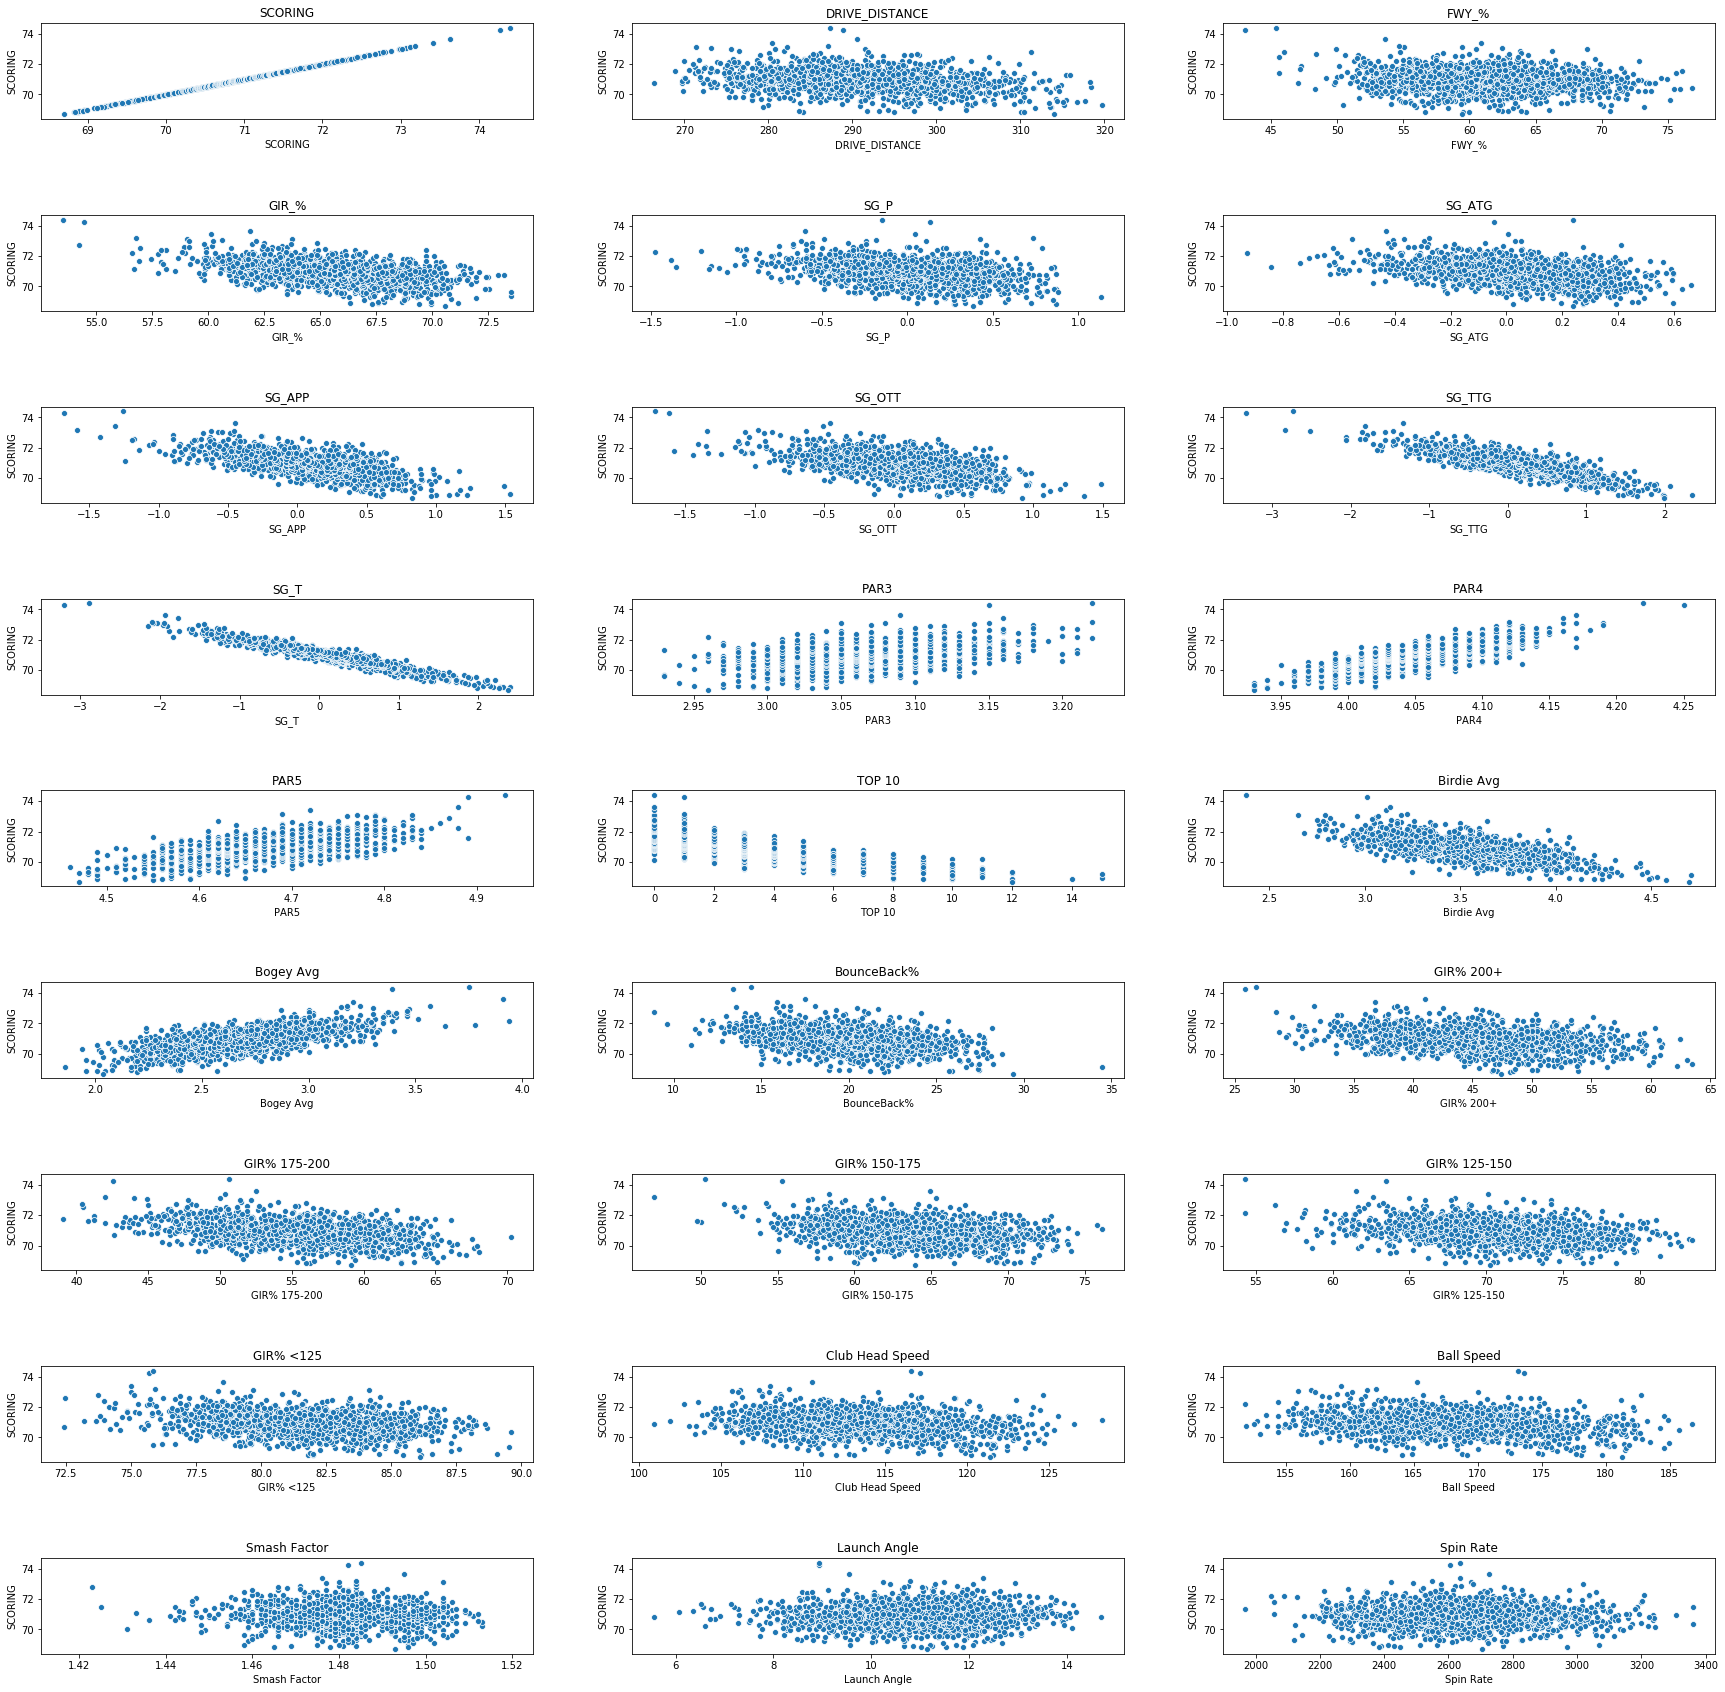

In [70]:
f, ax = plt.subplots(nrows = 9, ncols = 3, figsize=(30,30))
dist_cols = ['SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_ATG', 'SG_APP', 'SG_OTT', 'SG_TTG', 'SG_T', 'PAR3', 'PAR4', 'PAR5',
       'TOP 10', 'Birdie Avg', 'Bogey Avg',
       'BounceBack%', 'GIR% 200+', 'GIR% 175-200', 'GIR% 150-175',
       'GIR% 125-150', 'GIR% <125', 'Club Head Speed', 'Ball Speed',
       'Smash Factor', 'Launch Angle', 'Spin Rate']
row = 0
col = 0
for i, column in enumerate(dist_cols):
    graph = sns.scatterplot(x=column, y="SCORING", data=df, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

**Observations**

*   Most the statistics appear to show some trends when compared to scoring, however, some are stronger than the other. As found above, FWY_% is on the weak end of the spectrum while Stroked Gained Statistics and GIR_% are on the other end. 

## **Regression**

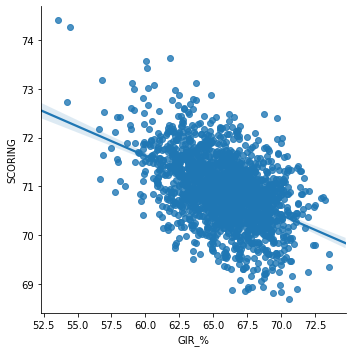

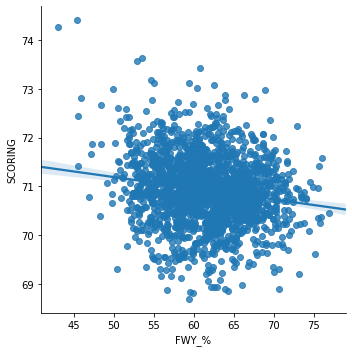

In [28]:
sns.lmplot(x='GIR_%', y='SCORING', data=df_pga)  
sns.lmplot(x='FWY_%', y='SCORING', data=df_pga)  

In [29]:
from sklearn.linear_model import LinearRegression

# features are the predictors or independent variables
scoring_features = df[['FWY_%', 'GIR_%', 'DRIVE_DISTANCE']]

# the outcome is the result or the dependent variables 
scoring_outcome = df['SCORING']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(scoring_features, scoring_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(scoring_features.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  84.87
The coefficients for the features are:
	 FWY_% : -0.03
	 GIR_% : -0.08
	 DRIVE_DISTANCE : -0.02


In [30]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(scoring_features, scoring_outcome).round(2))

This model's r-squared is: 0.27


In [31]:
# basic socring model
def scoring_model(fwy, grn, drv):
  scoring_prediction = fwy * -0.03 + grn * -0.08 + drv * -0.02 + 84.47
  return scoring_prediction

# Prediction using PGA Average
print("PGA Avg Prediction: ", scoring_model(61.46, 65.68, 290.79))
# Increase Drive by 5%
print("5%+ GIR Prediction: ", scoring_model(61.46, 70.68, 290.79))
# Increase Fairway by 5%
print("5%+ FIR Prediction: ", scoring_model(66.46, 65.68, 290.79))

PGA Avg Prediction:  71.556
5%+ GIR Prediction:  71.156
5%+ FIR Prediction:  71.406


### **Z-Score**

In [32]:
from scipy.stats import zscore

# creating z-score dataframe 
df_zscore = df.copy()
numeric_cols = df_zscore.select_dtypes(['int64', 'float64']).columns
df_zscore[numeric_cols] = df_zscore[numeric_cols].apply(zscore)

df_zscore.round(2).head()

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
0     Matt Kuchar    1.27    -1.87  ...         -0.44         -0.06      -0.68
1  Steve Stricker   -0.41    -1.80  ...         -0.35          0.18       0.19
2   Retief Goosen   -0.27    -1.71  ...          0.01         -0.20       0.70
3      Paul Casey   -1.04    -1.71  ...         -0.44         -0.40      -0.18
4       Jim Furyk   -0.20    -1.56  ...         -0.44         -0.62       0.20

[5 rows x 33 columns]

## **Overall Observations**

# **Question 2: What is the difference between a great season on TOUR, an average season, and a bad season on TOUR? and where do these differences come from?**

Here, we create 3 seprate buckets of scoring averages for players on TOUR. One for players who average under 70, one for players who average between 70 and 71.5 and finally one for players who average over 71.5 

In [33]:
df_compare = pd.DataFrame()
df_compare['AVG < 70'] = df[df['SCORING'] < 70].mean()
df_compare['70 < AVG < 71.5'] = df[(df['SCORING'] > 70) & (df['SCORING'] < 71.5)].mean()
df_compare['AVG > 71.5'] = df[df['SCORING'] > 71.5].mean()
df_compare.round(2).transpose()

ROUNDS  SCORING  ...  Launch Angle  Spin Rate
AVG < 70          77.16    69.62  ...         10.84    2622.53
70 < AVG < 71.5   81.76    70.82  ...         10.85    2636.26
AVG > 71.5        67.80    71.95  ...         10.89    2624.33

[3 rows x 32 columns]

**Observations**
* Here, we can observe that once again, ball-striking is king. There is a large difference is Strokes Gained-Tee to Green between each of the bucket which represents that majority of the differences between each bucket. 
* There is also a difference between driving distance between each of the groups. The difference between the top bucket and the bottom bucket is about 10 yards. According to Mark Broadie's Every Shot Counts, an extra ten yards equates to approximately 0.1 shots gained. Over the course of a round where you are hitting driver about 14 times, that equates to 1.4 shot gained just due to distance. This once again reinforces that ball striking and distance is king on the PGA TOUR. 

In [57]:
df_diff = pd.DataFrame()
df_diff['AVG < 70'] = df_compare['AVG < 70'] 
df_diff['70 < AVG < 71.5 vs. AVG < 70'] = (df_compare['AVG < 70'] - df_compare['70 < AVG < 71.5']) * -1
df_diff['AVG > 71.5 vs. AVG < 70'] = (df_compare['AVG < 70'] - df_compare['AVG > 71.5']) * -1
df_diff.transpose().round(2)

ROUNDS  SCORING  ...  Launch Angle  Spin Rate
AVG < 70                       77.16    69.62  ...         10.84    2622.53
70 < AVG < 71.5 vs. AVG < 70    4.60     1.20  ...          0.01      13.73
AVG > 71.5 vs. AVG < 70        -9.36     2.33  ...          0.05       1.80

[3 rows x 32 columns]

**Observations**

I created this dataframe to show the difference versus the top scoring average bucket. This will help me determine what poor players on TOUR tend to struggle with and if there are any unexpected gaps or differences between top vs. average and average vs. bottom.
- GIR% from 125-150 yards and 150-175. 1.34%/1.16% change from top to average but 2.33%/2.58% change from average to bottom. This shows me that bottom players struggle from 125-150 and 150-175 compared to the average player.
- Much of the scoring difference comes from PAR5 scoring. From average to top players, the difference is 0.03/0.04/0.09 on PAR3/PAR4/PAR5 scoring respectively. 

# **Question 3: Player improvement on the PGA TOUR**

In [35]:
df_byyear = pd.DataFrame()

for year in range(2010, 2019):
  df_byyear[year] = df[df['Year'] == year].mean()

df_byyear.transpose().round(2)

ROUNDS  SCORING  DRIVE_DISTANCE  ...  Smash Factor  Launch Angle  Spin Rate
2010   79.39    71.00          287.39  ...          1.47         10.67    2717.76
2011   78.03    70.87          291.05  ...          1.48         10.79    2671.76
2012   77.62    70.89          290.00  ...          1.48         10.89    2694.06
2013   72.19    70.93          287.88  ...          1.48         10.86    2641.54
2014   79.56    70.83          289.95  ...          1.48         11.00    2624.29
2015   81.67    70.94          290.29  ...          1.48         10.80    2591.39
2016   79.48    71.00          290.89  ...          1.49         10.54    2540.92
2017   80.78    70.92          292.69  ...          1.48         11.05    2574.01
2018   80.73    70.87          296.72  ...          1.49         11.06    2635.80

[9 rows x 32 columns]

Text(0.5, 1.0, 'Driving Distance (2010-2018)')

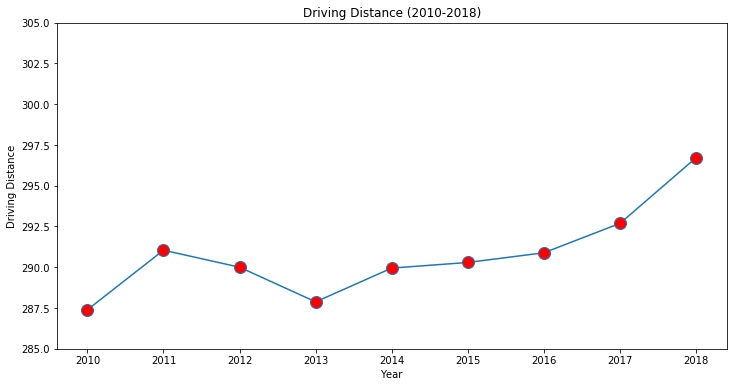

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Year').mean()['DRIVE_DISTANCE'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylim(ymin = 285, ymax=305)
plt.ylabel('Driving Distance')
plt.title('Driving Distance (2010-2018)')

**Observations**

- Driving Distance has been increasing gradually over the last ten years. This is something I plan to examine further to determine what caused the increase in distance. Two possibile explanations are an improvement in technology or an improvement in player fitness/clubhead speed.
- Par 5 scoring has improved over the last ten years and I believe this is due to the increase in distance. An increase of approxiamtely ten yards should equate to 0.1 shots lower which is what we are seeing.

# **Question 4: Predicting and Categorizing Wins**

In [61]:
df_winners = pd.DataFrame()
df_winners['1+ Wins'] = df[df['1ST'] > 0.5].mean()
df_winners['Zero Wins'] = df[df['1ST'] == 0].mean()
df_winners.round(2).transpose()

ROUNDS  SCORING  ...  Launch Angle  Spin Rate
1+ Wins     82.99    70.39  ...         10.94    2614.46
Zero Wins   77.91    71.04  ...         10.83    2637.26

[2 rows x 32 columns]

In [62]:
df.corr()['1ST'].abs().sort_values(ascending=False)

1ST                1.000000
Money              0.765947
TOP 10             0.527939
SCORING            0.417051
SG_T               0.416048
Birdie Avg         0.384125
SG_TTG             0.365472
PAR5               0.314278
PAR4               0.307393
SG_APP             0.275849
SG_OTT             0.258793
DRIVE_DISTANCE     0.219371
Bogey Avg          0.214559
Ball Speed         0.187031
Club Head Speed    0.177287
SG_P               0.159095
BounceBack%        0.157696
GIR% 200+          0.149542
GIR_%              0.146042
SG_ATG             0.142376
PAR3               0.132720
POINTS             0.118040
GIR% 175-200       0.106213
ROUNDS             0.101502
GIR% <125          0.097809
GIR% 125-150       0.067715
Spin Rate          0.056050
Launch Angle       0.042449
FWY_%              0.037583
GIR% 150-175       0.027475
Smash Factor       0.024868
Year               0.017929
Name: 1ST, dtype: float64

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# features are the predictors or independent variables
winning_features = df[['SCORING','DRIVE_DISTANCE', 'PAR5', 'PAR4', 'PAR3', 'GIR_%', 'FWY_%', 'Birdie Avg']]

# the outcome is the result or the dependent variables 
winning_outcome = df['1ST']

# fit (build) the model using the features and the outcome
winning_regression = LinearRegression().fit(winning_features, winning_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', winning_regression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(winning_features.columns, winning_regression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  13.47
The coefficients for the features are:
	 SCORING : -0.35
	 DRIVE_DISTANCE : 0.0
	 PAR5 : 0.36
	 PAR4 : 1.58
	 PAR3 : 0.77
	 GIR_% : -0.01
	 FWY_% : -0.0
	 Birdie Avg : 0.42


In [76]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", winning_regression.score(winning_features, winning_outcome).round(2))

This model's r-squared is: 0.21


# **Question 5: Examining individual players game**



## **Jordan Spieth**

Jordan Spieth is one the most popular players on the PGA TOUR. He had one of the greatest seasons in TOUR history in 2015 when he won 2 majors and 5 times total. He reached number one in the Official World Golf Ranking but since then, his game has been on the decline to today where he is now currently ranked 42nd. 

In [37]:
df_jordanspieth = df[df['NAME'] == 'Jordan Spieth']
df_jordanspieth

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
577   Jordan Spieth      82   69.668  ...         1.484         10.63     2356.0
762   Jordan Spieth     102   69.946  ...         1.484         11.39     2299.4
926   Jordan Spieth      91   68.938  ...         1.496         11.74     2565.8
1113  Jordan Spieth      80   69.520  ...         1.505         11.67     2268.7
1295  Jordan Spieth      85   68.846  ...         1.496         11.88     2449.2
1502  Jordan Spieth      81   69.904  ...         1.502         12.26     2335.6

[6 rows x 33 columns]

In [38]:
df_mean.transpose().round(2)

ROUNDS  SCORING  DRIVE_DISTANCE  ...  Smash Factor  Launch Angle  Spin Rate
PGA_AVG   78.85    70.92          290.79  ...          1.48         10.85    2633.05

[1 rows x 32 columns]

Text(0.5, 1.0, 'Jordan Spieth Scoring Average (2013-2019)')

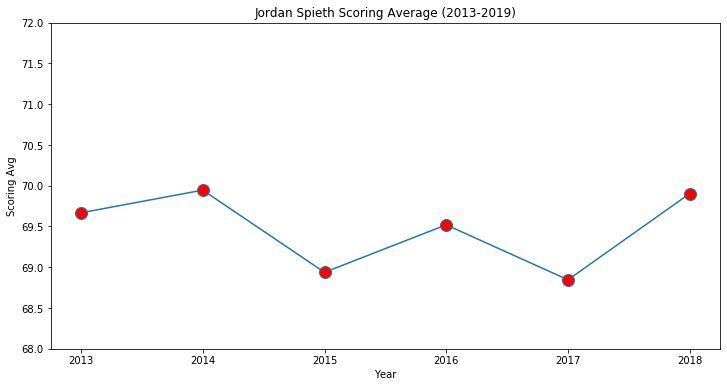

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df_jordanspieth.groupby('Year').mean()['SCORING'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylim(ymin = 68, ymax=72)
plt.ylabel('Scoring Avg')
plt.title('Jordan Spieth Scoring Average (2013-2019)')

Text(0.5, 1.0, 'Jordan Spieth Strokes Gained-Tee to Green (2013-2019)')

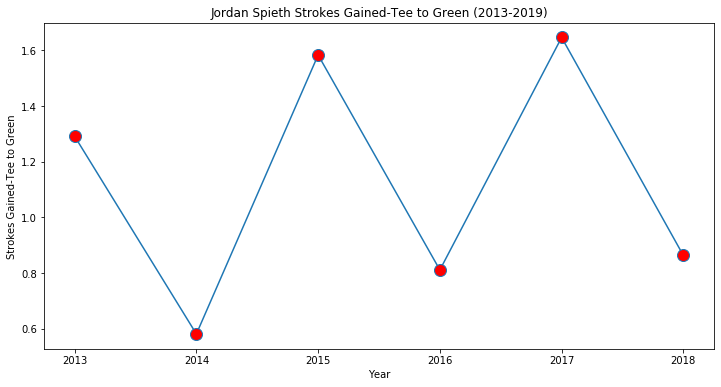

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df_jordanspieth.groupby('Year').mean()['SG_TTG'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylabel('Strokes Gained-Tee to Green')
plt.title('Jordan Spieth Strokes Gained-Tee to Green (2013-2019)')

### **Oberservations**
* For Jordan, there was the narrative that one reason why he struggled with his putting was due to having the 'yips'. However, his putting has very little correlation with his scoring average for the year. The truth is that the decline in Jordan's game comes from his ball striking. As shown above, the years where Jordan has the lowest scoring average are the years where is Strokes Gained-Tee to Green is the highest. They flucuate together.

In [41]:
df_jordanspieth_zscore = df_zscore[df_zscore['NAME'] == 'Jordan Spieth']
df_jordanspieth_zscore.round(2)

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
577   Jordan Spieth    0.22    -1.78  ...          0.27         -0.17      -1.31
762   Jordan Spieth    1.62    -1.39  ...          0.27          0.40      -1.57
926   Jordan Spieth    0.85    -2.83  ...          1.34          0.66      -0.32
1113  Jordan Spieth    0.08    -2.00  ...          2.14          0.61      -1.72
1295  Jordan Spieth    0.43    -2.96  ...          1.34          0.77      -0.87
1502  Jordan Spieth    0.15    -1.45  ...          1.87          1.05      -1.40

[6 rows x 33 columns]

**Future**
* Pull in additional data to find specifically where Jordan is struggling. EX: Is it from 100-125 yards... or off the tee, does he have a two way miss?

In [42]:
df_jordanspieth.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING            1.000000
SG_T               0.951799
1ST                0.918987
Money              0.911944
SG_ATG             0.891972
PAR4               0.890444
BounceBack%        0.885070
SG_TTG             0.882350
TOP 10             0.879296
Birdie Avg         0.864719
Spin Rate          0.801846
Bogey Avg          0.785469
SG_APP             0.759165
PAR3               0.710126
POINTS             0.490388
GIR_%              0.403098
SG_OTT             0.399306
Club Head Speed    0.394600
GIR% 200+          0.376627
Ball Speed         0.357092
GIR% 175-200       0.349477
SG_P               0.341370
GIR% <125          0.292333
Smash Factor       0.239296
Launch Angle       0.191596
Year               0.173003
GIR% 150-175       0.125814
ROUNDS             0.115727
PAR5               0.059692
GIR% 125-150       0.048288
FWY_%              0.037723
DRIVE_DISTANCE     0.018657
Name: SCORING, dtype: float64

## **Tiger Woods**

In [43]:
df_tigerwoods = df[df['NAME'] == 'Tiger Woods']
df_tigerwoods

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
379   Tiger Woods      69   68.904  ...         1.469         10.67     2391.5
570   Tiger Woods      61   68.944  ...         1.480         11.20     2512.9
1491  Tiger Woods      68   69.350  ...         1.482          9.72     2542.5

[3 rows x 33 columns]

## **Phil Mickelson**

In [44]:
df_philmickelson = df[df['NAME'] == 'Phil Mickelson']
df_philmickelson

NAME  ROUNDS  SCORING  ...  Smash Factor  Launch Angle  Spin Rate
9     Phil Mickelson      76   69.966  ...         1.475         12.27     2573.4
207   Phil Mickelson      79   69.891  ...         1.480         11.54     2535.3
397   Phil Mickelson      79   70.030  ...         1.483         10.35     2754.5
580   Phil Mickelson      78   69.742  ...         1.471         10.54     2618.1
783   Phil Mickelson      71   70.278  ...         1.480         12.88     2569.0
973   Phil Mickelson      70   70.585  ...         1.463         11.93     2646.2
1114  Phil Mickelson      75   69.582  ...         1.498         11.55     2709.4
1322  Phil Mickelson      85   70.168  ...         1.492         12.76     2624.8
1509  Phil Mickelson      90   70.098  ...         1.494         12.53     2702.9

[9 rows x 33 columns]

# **Question 6: Examining Driving Distance**

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# features are the predictors or independent variables
driving_features = df[['Club Head Speed', 'Ball Speed', 'Launch Angle', 'Spin Rate']]

# the outcome is the result or the dependent variables 
driving_outcome = df['DRIVE_DISTANCE']

# fit (build) the model using the features and the outcome
driving_regression = LinearRegression().fit(driving_features, driving_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', driving_regression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(driving_features.columns, driving_regression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  50.24
The coefficients for the features are:
	 Club Head Speed : -0.26
	 Ball Speed : 1.62
	 Launch Angle : 1.11
	 Spin Rate : -0.01


In [46]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", driving_regression.score(driving_features, driving_outcome).round(2))

This model's r-squared is: 0.88


In [47]:
# Driving Model - Club Head Speed, Ball Speed, Launch Angle, Spin Rate
def driving_model(chs, bs, la, sr):
  print("Predicition: ", driving_regression.predict([[chs, bs, la, sr]])[0].round(2))

driving_model(115, 170, 11, 2100)
driving_model(115, 170, 11, 500)
driving_model(115, 170, 11, 4000)

Predicition:  296.49
Predicition:  304.78
Predicition:  286.64


**Observations**
- As a golfer, I know this model is not quite accurate. When the spin rate is 500, the ball does not spin enough to stay in the air. When the spin rate is 4000, the ball spins too much and will fall out of the air. We will need a non-linear model to predict the optimized value for the golfer. 

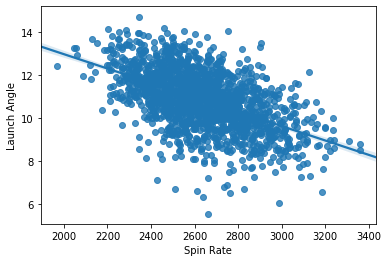

In [48]:
sns.regplot(x="Spin Rate", y="Launch Angle", data=df)

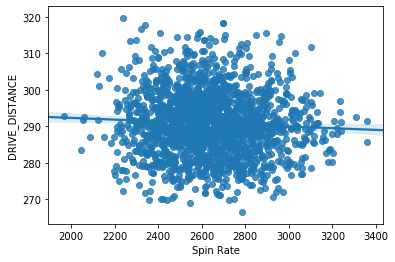

In [49]:
sns.regplot(x="Spin Rate", y="DRIVE_DISTANCE", data=df)

**Observations**
- There is a relationship between spin rate and launch angle in order to optimize driving distance. It could suggest a lower launch angle will need more spin to stay in the air longer while a high launch angle requires less spin as it can cut through the air better without ballooning. 

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df['DRIVE_DISTANCE'], df['Spin Rate'], test_size=0.2, random_state=0)

**What? How? Why?**
- I have a great dataset on PGA TOUR golfers and my analysis on what makes golfers good can help improve my own game.

**Outline**
- What makes PGA Golfers good?
- Driving Distance: How does one hit the ball far?
- Logistic Regression to categorize winner or non-winner. Use Machine Learning and video from earlier in semester

# **Appendix**

## **Full List of Variables with Descripitons**

*   **NAME** - The name of the golfer
*   **ROUNDS** - The number of rounds played in the given season
*   **SCORING** - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played. The adjustment is computed by determining the stroke average of the field for each round played. This average is subtracted from par to create an adjustment for each round. A player accumulates these adjustments for each round played.
*   **DRIVE_DISTANCE** - The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not 
*   **FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).
*   **GIR_%** - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. (The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))
*   **SG_P (Strokes Gained Putting)** - The number of putts a player takes from a specific distance is measured against a statistical baseline to determine the player's strokes gained or lost on a hole. The sum of the values for all holes played in a round minus the field average strokes gained/lost for the round is the player's Strokes gained/lost for that round. The sum of strokes gained for each round are divided by total rounds played. 
*   **SG_ATG (Strokes Gained Around the Green)** - The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_APP (Strokes Gained Approach)** - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_OTT (Strokes Gained Off the Tee)** - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee on a hole. 
*   **SG_TTG (Strokes Gained Tee to Green)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event minus the Players Strokes Gained putting value. 
*   **SG_T (Strokes Gained Total)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event.
*   **PAR3 (Par 3 Scoring)** - The average score on all par 3's played (e.g. 3.22)
*   **PAR4 (Par 4 Scoring)** - The average score on all par 4's played (e.g. 4.22)
*   **PAR5 (Par 5 Scoring)** - The average score on all par 5's played (e.g. 5.22)
*   **POINTS** - Total number of FedEx Cup points
*   **TOP 10** - The number of top 10 finishes
*   **1ST** - The number of tournaments won
*   **YEAR** - The year of the season for the statistics
-   **Birdie Avg** - The average number of birdies a player makes a round.
-   **Bogey Avg** - The average number of bogeys a player makes a round.
-   **Money** - The amount of amount a player earned durnig a given season.
-   **BounceBack%** - The percentage of holes a player makes a biride after making a bogey or worse.
-   **GIR% 200+** - The percentage of the greens hit from over 200 yards away from the hole. 
-   **GIR% 175-200** - The percentage of the greens hit between 175-200 yards away from the hole. 
-   **GIR% 150-175** - The percentage of the greens hit between 150-175 yards away from the hole.
-   **GIR% 125-150** - The percentage of the greens hit between 125-150 yards away from the hole.
-   **GIR% <125** - The percentage of the greens hit less than 125 yards away from the hole.
-   **Club Head Speed** - The average speed of the club head on driver swings
-   **Ball Speed** - The average speed of the ball on driver swings
-   **Smash Factor** - Ball Speed / Club Head Speed
-   **Launch Angle** - The angle between the ball and the ground at impact on driver swings
-   **Spin Rate** - The number of revolutions per minute of the golf ball on driver swings